### Intro to Data vis with Matplotlib 

In [1]:
# import course packages
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
# importing datasets
weather = pd.read_csv('D:\data\datasets\seattle_weather.csv',index_col='DATE')
seattle_weather = weather[weather['NAME'] == 'SEATTLE SAND PT WSFO, WA US']
austin_weather = pd.read_csv(r'D:\data\datasets\austin_weather.csv',index_col='DATE')
climate = pd.read_csv(r'D:\data\datasets\climate_change.csv',index_col = 'date',parse_dates=['date']) #DateTime index
medals = pd.read_csv(r'D:\data\datasets\medals_by_country_2016.csv', index_col = 0)
athletes = pd.read_csv(r'D:\data\datasets\summer2016.csv', index_col = 0)
# derived from athletes DF 
mens_gymnastics = athletes [ athletes['Sport'] == 'Gymnastics' ]
mens_rowing = athletes [athletes['Sport'] == 'Rowing' ]  

In [2]:
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
austin_weather ['MONTH'] = month
seattle_weather['MONTH'] = month

D:\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


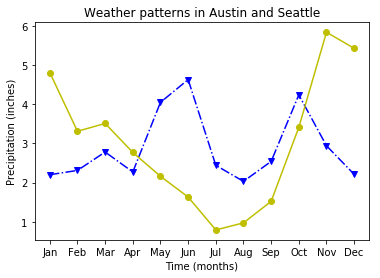

<Figure size 576x432 with 0 Axes>

In [3]:
# figure and axes objects
fig, ax = plt.subplots()
# add data with Axes
# additional vertical markers (Standard deviation) 
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'b', marker = 'v',linestyle = '-.')
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],color = 'y', marker = 'o',linestyle = 'solid')
#customizing Data apperance
ax.set_xlabel('Time (months)')
ax.set_ylabel('Precipitation (inches)')
ax.set_title('Weather patterns in Austin and Seattle')
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
# additional vertical markers (Standard deviation) 
fig, ax = plt.subplots()
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], yerr = seattle_weather ['MLY-TAVG-STDDEV'], label = 'Seattle')
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], yerr = austin_weather ['MLY-TAVG-STDDEV'], label = 'Austin')
ax.set_ylabel('Temperatue (Fahrenheit)')
ax.legend()
plt.show()

### changing plot style
 **Change fonts, line colors, backgroud color, grid, ...**
 -  ggplot
 - dark_background
 - fivethirtyeight 
 - grayscale
 - Solarize_Light2
 - bmh
 - seaborn-colorblind
 
#### How to choose the suitable style ?
- **if to communicate with others, then** 
    - Dark backgrounds are not preferrable due to the less visibility. 
- **if color is important, then :** 
    - Choose colorblind-friendly options ('seaborn-colorblind' or 'tableau-colorblind10')
    - it's designed to retain color even if viewed by a colorblind individual (1 out of 20)
- **if it's for printed reports use less ink:** 
    - Avoid colored backgrounds like (ggplot)
    - if it gonna be printed in black & white use (grayscale)

In [ ]:
# changing plot style 
plt.style.use('bmh') 
# The ggplot library from R:added gray back ground that create a faint white grid, changing color, fonts
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], label = 'Seattle')
ax.plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], label = 'Austin')
ax.set_title ('Monthly average Temperature by state')
# remove gridlines, axes, ticks
ax.grid(False)
ax.tick_params(left = False, bottom = False)
# To remove ticklabels too 
# kwargs as inputs inside tick_params() method as : labelleft = False , labelbottom = False
ax.legend()
plt.show()

In [ ]:
## adding more data
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"],color = 'y',linestyle = '--')
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],color = 'y',linestyle = 'solid')
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"],color = 'y',linestyle = '--')
plt.show()

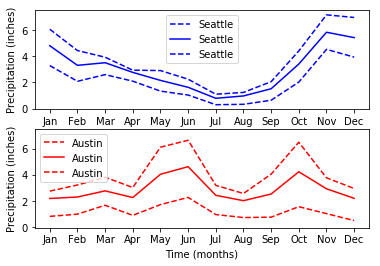

In [4]:
# creating a grid of subplots (small multiples: side by side)
# special case: a row aarray or column array (single-indexed)
fig, ax = plt.subplots(2, 1, sharey=True)
# seattle percipitation data
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"],color = 'b',linestyle = '--', label = 'Seattle')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],color = 'b',linestyle = 'solid', label = 'Seattle')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"],color = 'b',linestyle = '--', label = 'Seattle')
#Austin percipitation data
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"],color = 'r',linestyle = '--', label = 'Austin')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"],color = 'r',linestyle = 'solid', label = 'Austin')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"],color = 'r',linestyle = '--', label = 'Austin')
ax[0].set_ylabel('Precipitation (inches)')
ax[1].set_ylabel('Precipitation (inches)')
ax[1].set_xlabel('Time (months)')
# adding legends (labels)
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
# plotting time-series data 
fig, ax = plt.subplots()
ax.plot(climate.index, climate['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()

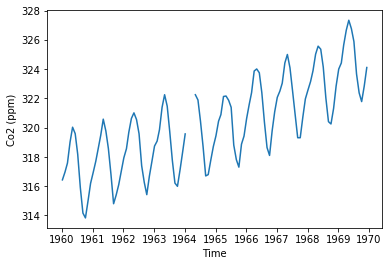

In [5]:
fig, ax = plt.subplots()
# zooming in a decade
# sixties = pd.DataFrame(pd.date_range ('1959-01-01',periods = 11, freq='Y'))
sixties = climate ['1960-01-01':'1969-12-31'] 
ax.plot(sixties.index,sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()


In [ ]:
# zooming in 1969 
sixty_nine = climate ['1969-01-01':'1969-12-31']
fig, ax = plt.subplots()
ax.plot(sixty_nine.index,sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2 (ppm)')
plt.show()

In [ ]:
# plotting time-series with different vars (Co2 level and relative temp)
fig ,ax = plt.subplots()
ax.plot(climate.index, climate['co2'])
ax.plot(climate.index, climate['relative_temp'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm) / Relative temperature')
plt.show()

- **note: Two different scales therefore the 'CO2' level columns has been shifted upward while the 'relative_temp' column looks like it is flat (not accurate).**
- **We need to plot them in the same subplot but with different y-axis scales but they share the x-axis.**

In [ ]:
# using twin axes methods
fig, ax = plt.subplots()
ax.plot(climate.index, climate['co2'], color = 'b')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color = 'b')
ax.tick_params('y', colors = 'b')
ax2 = ax.twinx()
ax2.plot(climate.index, climate['relative_temp'], color = 'red')
ax2.set_ylabel('Relative temperature (Celsius)', color = 'red')
ax2.tick_params('y', colors = 'r')
plt.show()

In [ ]:
# customized func to plot time series 
def plot_timeseries (axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y', colors = color)

In [ ]:
# using our function 
fig, ax =plt.subplots() 
plot_timeseries(ax, climate.index, climate['co2'], 'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx() 
plot_timeseries(ax2, climate.index, climate['relative_temp'], 'red','Time', 'Relative temperature (Celsius)')
# annotating time-series data: a partiular part of plot that we want to focus on 
# xy : coordinates of the annotating data, xytext: positioning the text (suitable optional position), 
# and arrowprops: can be {} empty dict or customized   
ax2.annotate(' > 1 degree ', xy= (pd.Timestamp("2015-10-06"),1), xytext = (pd.Timestamp('2008-10-06'),-0.2), arrowprops={'arrowstyle':'->','color':'black'})
plt.show()

In [ ]:
# ch3: Quantitative comparisons
# bar charts used for categorical vars with numerical values in different conitions and can be stacked on top of each other
gold_medals = medals.sort_values('Gold', ascending = False)
fig, ax = plt.subplots()
ax.bar(gold_medals.index,gold_medals['Gold'], color = 'yellow', alpha=0.7)
# prevent overlapping in x-axis labels
ax.set_xticklabels(gold_medals.index,rotation = 90)
ax.set_ylabel('Gold medals')
plt.show()

### saving the figure to the file: 
- different file formats such as :
    - png: provides lossless compression of image, it means it is high quality and needs larger bandwidth or diskspace.
    - jpg: 
        - provides a lossy compression, needs less diskspace and u can set the degree of loss by setting quality = [1:100]
        - best for websites/sharing use.
    - svg: vector graphics file for more editing on grapghics softwares. 
    - **dpi kwarg: represents the dots/inch 300 is a fairly high-reolution quality, (the higher, the more size you'll need)**
    

In [ ]:
# preparing for sharing with others
fig, ax = plt.subplots()
ax.bar(gold_medals.index,medals['Gold'], color = 'yellow', alpha=0.7)
# prevent overlapping in x-axis labels
ax.set_xticklabels(medals.index,rotation = 270)
ax.set_ylabel('Gold medals')
ax.set_title('The Best 2016')
# figure object (set_size_inches)
fig.set_size_inches([6,8])
#saving the figure
fig.savefig('The Best 2016.png', dpi = 300)
fig.savefig('The Best 2016.jpg', quality = 50)
fig.savefig('The Best 2016.svg')

In [ ]:
# stacked bar charts : all in one
# legend method requires label kwarg in the bar method of axes object
fig, ax = plt.subplots()
ax.bar(medals.index, medals ['Gold'], label = 'Gold')
ax.bar(medals.index, medals ['Silver'], bottom = medals ['Gold'], label = 'Silver')
ax.bar(medals.index, medals ['Bronze'], bottom = medals ['Gold'] + medals ['Silver'], label = 'Bronze' )
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel('Olympic medals')
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
# additional vertical markers to summarize the full distribution in one number (Standard deviation).
ax.bar('Rowing',mens_rowing['Height'].mean(), yerr = mens_rowing['Height'].std())
ax.bar('Gymnastics', mens_gymnastics['Height'].mean(), yerr = mens_gymnastics['Height'].std())
ax.set_ylabel('Height (Cm)')
plt.show()

In [ ]:
# adding boxplots(statistical plotting) : 
# it shows us the distribrution in a kroky abbreviated way (5 num summary), it takes a list i/p
# 99% of data should be included in if the distribution is guassian or normal 
fig, ax = plt.subplots()
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])
ax.set_ylabel('Height (Cm)')
ax.set_xticklabels(['Rowing','Gymnastics'], rotation = 90)
plt.show()

In [ ]:
# histogram is for the entire distribution of values within a variable
# x is the range of values for a variable, y is the frequency of certain values divided in intervals
# deafult # of bins is ten also, we can set bins = [val1,val2,val3,....] = n-1 or bins = integer
# sometimes we need to eliminate the hist type to 'step' rather than the deafult solid 'bar' type ...
# ... to show the hidden distribution of interest or to change alpha to lowervalue than deafult one
fig, ax = plt.subplots()
ax.hist(mens_rowing['Height'], label = 'Rowers', bins = [150,160,170,180,190,200,210], histtype = 'step')
ax.hist(mens_gymnastics['Height'], label = 'Gymnasts', bins = 5, histtype = 'step')
ax.set_xlabel('Height (Cm)')
ax.set_ylabel('fequency')
ax.legend()
plt.show()

- **Statistical plotting : a set of methods to use visualization to make comparisons and how can make them look more formal**
- **Adding error bars to bar/line charts: There are 'yerr' or 'xerr' depending on the case of variable on which of them** 
- **'yerr' or 'xerr' kwarg in the plot command can take a column of 'STDDEV' values or through .std() method on a column** 
- **To summarize the distribution in one number (std) rather than the entire distribution using histogram**
- **or adding boxplots**

In [ ]:
# bar charts : shows us the value of one variable in diff conditions
# Scatter plots : compare bet diff variables across obsservations (Bi-variate comparisons)
fig, ax = plt.subplots()
ax.scatter(climate['co2'], climate['relative_temp'])
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temperature (Celsisus)')
plt.show()

In [ ]:
# encoding a third variable (DF time index) by a color
# time of the measurments is encoded in the brightness of the color
fig, ax = plt.subplots()
ax.scatter(climate['co2'], climate['relative_temp'], c = climate.index)
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temperature (Celsisus)')
plt.show()

In [ ]:
# customizing scatter plots  : time-series indexing
eighties = climate ["1980-01-01":"1989-12-31"]
nineties = climate ['1990-01-01': '1999-12-31'] 
fig, ax = plt.subplots()
# Encoding a comparison by color 
ax.scatter(eighties ['co2'], eighties ['relative_temp'], label = '80s', color = 'r')
ax.scatter(nineties ['co2'], nineties ['relative_temp'], label = '90s', color = 'b')
ax.set_xlabel('CO2 levels')
ax.set_ylabel ('Relative temp (Celsius)')
ax.legend()
plt.show()

### Automating figure from data 
- provides flexibility to adapt to new inputs provided. 
- This ensures : flexibility, reproducibility, robustness ,ease and speed.

In [ ]:
sports = athletes['Sport'].unique()
fig, ax = plt.subplots()
for sport in sports : 
    sport_df = athletes [athletes["Sport"] == sport]
    ax.bar(sport, sport_df['Height'].mean(), yerr = sport_df['Height'].std())
ax.set_ylabel('Height (Cm)')
ax.set_xticklabels(sports, rotation = 90)
fig.set_size_inches([10,8])
plt.show()